### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [72]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dataframe

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [73]:
df_sin_duracion = dataframe.drop(['duracion'], axis=1)

In [74]:
X = np.array(dataframe.drop(['duracion'], axis=1))
y = np.array(dataframe['duracion'])

In [75]:
print('X:', X.shape)
print('y:', y.shape)

X: (170, 4)
y: (170,)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=101)

In [77]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (136, 4)
X_test: (34, 4)
y_train: (136,)
y_test: (34,)


In [78]:
model = LinearRegression()

In [79]:
model.fit(X_train, y_train)

LinearRegression()

In [80]:
coef = model.coef_
print("Pendiente:", coef)

Pendiente: [56.74966999 -1.43283941 -0.49629566 32.02178994]


In [81]:
coeff_df = pd.DataFrame(coef, df_sin_duracion.columns, columns=['Coefficient'])
coeff_df

,Coefficient
paginas,56.749670
acciones,-1.432839
valor,-0.496296
clase,32.021790


Interpretación de coeficientes:

Manteniendo el resto de las variables constantes, vemos que:
* Un incremento de **una unidad** en el número de ``paginas`` genera un **aumento** de la ``duracion`` en 56.74967 unidades.
* Un incremento de **una unidad** en el número de ``acciones`` genera un **descenso** de la ``duracion`` en 1.432839 unidades.
* Un incremento de **una unidad** en el número de ``valor`` genera un **descenso** de la ``duracion`` en 0.496296 unidades.
* Un incremento de **una unidad** en el número de ``clase`` genera un **aumento** de la ``duracion`` en 32.021790 unidades.

In [82]:
score_train = model.score(X_train, y_train) * 100
print('SCORE train:', score_train)
score_test = model.score(X_test, y_test) * 100
print('SCORE test:', score_test)
score_total = model.score(X, y) * 100
print('SCORE total:', score_total)

SCORE train: 11.822945926275086
SCORE test: 0.6761052940610801
SCORE total: 8.749468479299537


## Resultados de SCORE muy bajos

In [83]:
print('RMSE train:', np.sqrt(mean_squared_error(y_train, model.predict(X_train))))

RMSE train: 180.21706807647712


In [84]:
print('RMSE test:', np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

RMSE test: 236.6280567166665


In [85]:
print('Duración máxima:', dataframe['duracion'].max())

Duración máxima: 898.0


In [86]:
dataframe

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


## Teniendo en cuenta que la duración máxima es de 898, un RMSE de prácticamente el 25% podría considerarse elevado.

### CORRELACIÓN Y CONCLUSIONES

<AxesSubplot:>

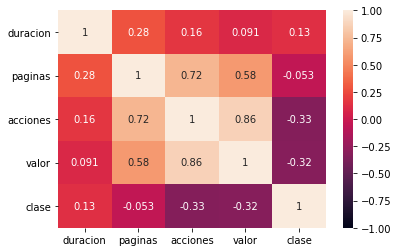

In [87]:
sns.heatmap(dataframe.corr(),
           vmin = -1,
           vmax = 1,
           annot = True)

Viendo la matriz de correlación, vemos que los resultados de la regresión tienen coherencia en algunos casos y en otros no. Por ejemplo, la correlación entre la ``duración`` y las ``páginas`` es ligeramente positiva, como en el caso del aumento de la duración por cada unidad de aumento de páginas. Lo mismo sucede para la ``duración`` al relacionarla con la ``clase``. Esto no sucede en cambio cuando se evalúan las ``acciones`` o el ``valor`` en función de la ``duración``.

Observando también el **SCORE** y **RMSE** obtenido, podemos decir que la ``regresión lineal`` no es una buen método para evaluar éste dataset.

---

# Se hace la regresión quitando ahora la columna CLASE

In [88]:
df_sin_duracion_ni_clase = dataframe.drop(['duracion', 'clase'], axis=1)

In [89]:
X_sin_clase = np.array(dataframe.drop(['duracion', 'clase'], axis=1))
y_sin_clase = np.array(dataframe['duracion'])

In [90]:
X_sin_clase_train, X_sin_clase_test, y_sin_clase_train, y_sin_clase_test = train_test_split(X_sin_clase, y_sin_clase, test_size= 0.2, random_state=101)

In [91]:
print('X_sin_clase_train:', X_sin_clase_train.shape)
print('X_sin_clase_test:', X_sin_clase_test.shape)
print('y_sin_clase_train:', y_sin_clase_train.shape)
print('y_sin_clase_test:', y_sin_clase_test.shape)

X_sin_clase_train: (136, 3)
X_sin_clase_test: (34, 3)
y_sin_clase_train: (136,)
y_sin_clase_test: (34,)


In [92]:
model_sin_clase = LinearRegression()

In [93]:
model_sin_clase.fit(X_sin_clase_train, y_sin_clase_train)

LinearRegression()

In [94]:
coef_sin_clase = model_sin_clase.coef_
print("Pendiente sin clase:", coef_sin_clase)

Pendiente sin clase: [65.61708334 -3.17117144 -0.53631588]


In [95]:
coeff_df_sin_clase = pd.DataFrame(coef_sin_clase, df_sin_duracion_ni_clase.columns, columns=['Coefficient'])
coeff_df_sin_clase

,Coefficient
paginas,65.617083
acciones,-3.171171
valor,-0.536316


Interpretación de coeficientes: --> En éste caso no se tiene en cuenta la "clase"

Manteniendo el resto de las variables constantes, vemos que:
* Un incremento de **una unidad** en el número de ``paginas`` genera un **aumento** de la ``duracion`` en 65.617083 unidades.
* Un incremento de **una unidad** en el número de ``acciones`` genera un **descenso** de la ``duracion`` en 3.171171 unidades.
* Un incremento de **una unidad** en el número de ``valor`` genera un **descenso** de la ``duracion`` en 0.536316 unidades.

In [96]:
score_train_sin_clase = model_sin_clase.score(X_sin_clase_train, y_sin_clase_train) * 100
print('SCORE train sin clase:', score_train_sin_clase)
score_test_sin_clase = model_sin_clase.score(X_sin_clase_test, y_sin_clase_test) * 100
print('SCORE test sin clase:', score_test_sin_clase)

SCORE train sin clase: 10.246444922736831
SCORE test sin clase: -1.7400321001670882


In [97]:
prediccion_sin_clase = model_sin_clase.predict(X_sin_clase_test)

In [98]:
print('RMSE sin clase:', np.sqrt(mean_squared_error(y_sin_clase_test, prediccion_sin_clase)))

RMSE sin clase: 239.4888518302233


In [99]:
print('Duración máxima:', dataframe['duracion'].max())

Duración máxima: 898.0


## Teniendo en cuenta que la duración máxima es de 898, un RMSE de prácticamente el 25% podría considerarse elevado.

### CORRELACIÓN Y CONCLUSIONES

In [100]:
dataframe.corr()

,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.277550,0.163028,0.090869,0.128706
paginas,0.277550,1.000000,0.724061,0.583910,-0.052813
acciones,0.163028,0.724061,1.000000,0.862961,-0.329954
valor,0.090869,0.583910,0.862961,1.000000,-0.322737
clase,0.128706,-0.052813,-0.329954,-0.322737,1.000000


In [101]:
dataframe_sin_clase = dataframe[['duracion', 'paginas', 'acciones', 'valor']]

<AxesSubplot:>

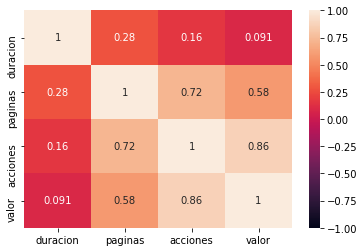

In [102]:
sns.heatmap(dataframe_sin_clase.corr(),
           vmin = -1,
           vmax = 1,
           annot = True)

Viendo la matriz de correlación, vemos que los resultados de la regresión tienen coherencia en algunos casos y en otros no. Por ejemplo, la correlación entre la ``duración`` y las ``páginas`` es ligeramente positiva, como en el caso del aumento de la duración por cada unidad de aumento de páginas. Lo mismo sucede para la ``duración`` al relacionarla con la ``clase``. Esto no sucede en cambio cuando se evalúan las ``acciones`` o el ``valor`` en función de la ``duración``.

Observando también el **SCORE** y **RMSE** obtenido, podemos decir que la ``regresión lineal`` no es una buen método para evaluar éste dataset.